In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
sns.set()

In [161]:
K18Mark4 = pd.read_excel("K18Mark.xlsx",na_values = ":", usecols = ["Mã SV","Họ","Tên","Lớp","Điểm hệ 4"], sheet_name = 'Khoa CNTT')
display(K18Mark4.head())
print("Shape:",K18Mark4.shape)
print(f"Min Điểm hệ 4: {K18Mark4['Điểm hệ 4'].min()}, max điểm hệ 4: {K18Mark4['Điểm hệ 4'].max()}")
print(f"Number of unique Lớp: {list(K18Mark4['Lớp'].unique())}")
print("***FREQUENCY***")
print(f"<<<Count of Lớp>>> \n{K18Mark4['Lớp'].value_counts()}")
print(f"<<<Count of Điểm>>> \n{K18Mark4['Điểm hệ 4'].value_counts()}")

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4
0,DTC1954802020002,Nguyễn Tuấn,Anh,ATTT K18A,2.07
1,DTC19H4802020005,Nguyễn Hoàng Khánh,Duy,ATTT K18A,2.33
2,DTC1954802020003,Mai Trung,Đức,ATTT K18A,2.40
3,DTC19H4802020008,Nguyễn Hoàng,Hà,ATTT K18A,1.67
4,DTC19H4802020003,Đào Văn,Hiếu,ATTT K18A,1.39


Shape: (327, 5)
Min Điểm hệ 4: 0.0, max điểm hệ 4: 3.86
Number of unique Lớp: ['ATTT K18A', 'CNTT K18 CLC', 'CNTT K18A', 'CNTT K18B', 'CNTT K18C', 'CNTT K18D', 'CNTT K18ĐT', 'CNTT K18E', 'KHMT K18A', 'KTPM K18A', 'KTPM K18B', 'KTPM K18ĐT']
***FREQUENCY***
<<<Count of Lớp>>> 
CNTT K18A       45
KTPM K18A       44
KTPM K18B       44
CNTT K18D       39
CNTT K18B       35
CNTT K18C       33
CNTT K18 CLC    26
CNTT K18E       23
KTPM K18ĐT      14
ATTT K18A       11
CNTT K18ĐT      10
KHMT K18A        3
Name: Lớp, dtype: int64
<<<Count of Điểm>>> 
0.00    25
3.00    13
2.64    12
1.57    12
2.00    12
        ..
3.86     1
1.17     1
2.45     1
1.80     1
2.31     1
Name: Điểm hệ 4, Length: 105, dtype: int64


In [162]:
nbins = 15
arrDiem = np.array(K18Mark4['Điểm hệ 4'])
bins = np.linspace(arrDiem.min()-0.0001, arrDiem.max(), nbins + 1)
print(f"Number of interval {nbins} bins is calculated:")
display(bins)
K18Mark4["binned"] = pd.cut(arrDiem, bins)
display(K18Mark4.head())
print(K18Mark4['binned'].value_counts())

Number of interval 15 bins is calculated:


array([-1.00000e-04,  2.57240e-01,  5.14580e-01,  7.71920e-01,
        1.02926e+00,  1.28660e+00,  1.54394e+00,  1.80128e+00,
        2.05862e+00,  2.31596e+00,  2.57330e+00,  2.83064e+00,
        3.08798e+00,  3.34532e+00,  3.60266e+00,  3.86000e+00])

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4,binned
0,DTC1954802020002,Nguyễn Tuấn,Anh,ATTT K18A,2.07,"(2.059, 2.316]"
1,DTC19H4802020005,Nguyễn Hoàng Khánh,Duy,ATTT K18A,2.33,"(2.316, 2.573]"
2,DTC1954802020003,Mai Trung,Đức,ATTT K18A,2.40,"(2.316, 2.573]"
3,DTC19H4802020008,Nguyễn Hoàng,Hà,ATTT K18A,1.67,"(1.544, 1.801]"
4,DTC19H4802020003,Đào Văn,Hiếu,ATTT K18A,1.39,"(1.287, 1.544]"


(1.544, 1.801]      42
(1.801, 2.059]      37
(2.059, 2.316]      37
(2.573, 2.831]      34
(2.316, 2.573]      33
(2.831, 3.088]      27
(-0.0001, 0.257]    25
(1.287, 1.544]      24
(1.029, 1.287]      16
(3.345, 3.603]      13
(0.515, 0.772]      11
(3.088, 3.345]       9
(3.603, 3.86]        8
(0.772, 1.029]       7
(0.257, 0.515]       4
Name: binned, dtype: int64


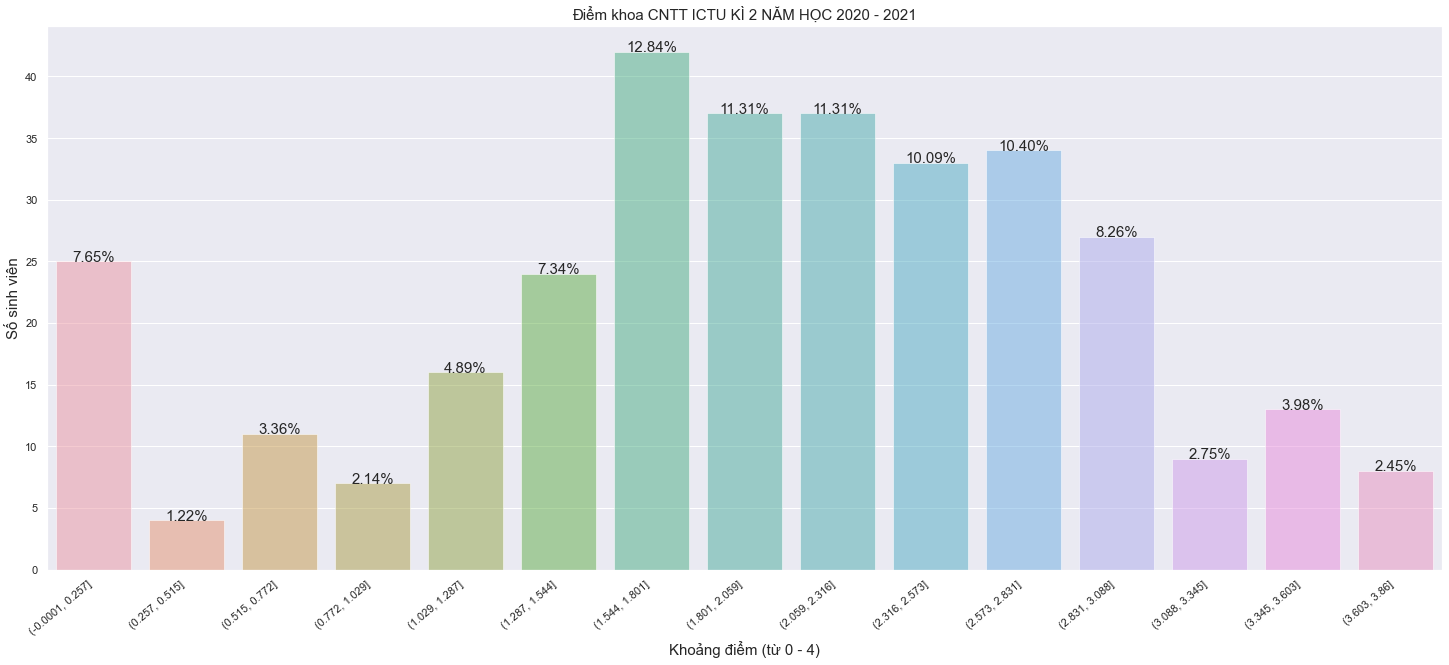

In [163]:
figure(figsize = (25,10))
plt.title("Điểm khoa CNTT ICTU KÌ 2 NĂM HỌC 2020 - 2021", size = 15)
ax = sns.countplot(x = "binned", data = K18Mark4, alpha = 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.xlabel("Khoảng điểm (từ 0 - 4)", size = 15)
plt.ylabel("Số sinh viên", size = 15)

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(K18Mark4))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha = "center", size = 15)
    
plt.savefig("File\\Điểm khoa CNTT kì 2 năm học 2020 - 2021.jpg")

In [164]:
nbins = 15
arrDiem = np.array(K18Mark4['Điểm hệ 4'])
bins = np.linspace(2.49999, arrDiem.max(), nbins -3)
print(f"Number of interval {nbins} bins is calculated:")
display(bins)
K18Mark4["binned"] = pd.cut(arrDiem, bins)
display(K18Mark4.head())
print(K18Mark4['binned'].value_counts())

Number of interval 15 bins is calculated:


array([2.49999   , 2.62362727, 2.74726455, 2.87090182, 2.99453909,
       3.11817636, 3.24181364, 3.36545091, 3.48908818, 3.61272545,
       3.73636273, 3.86      ])

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4,binned
0,DTC1954802020002,Nguyễn Tuấn,Anh,ATTT K18A,2.07,NaN
1,DTC19H4802020005,Nguyễn Hoàng Khánh,Duy,ATTT K18A,2.33,NaN
2,DTC1954802020003,Mai Trung,Đức,ATTT K18A,2.40,NaN
3,DTC19H4802020008,Nguyễn Hoàng,Hà,ATTT K18A,1.67,NaN
4,DTC19H4802020003,Đào Văn,Hiếu,ATTT K18A,1.39,NaN


(2.624, 2.747]    22
(2.995, 3.118]    19
(2.747, 2.871]    13
(2.5, 2.624]      11
(3.242, 3.365]     9
(3.365, 3.489]     8
(2.871, 2.995]     6
(3.118, 3.242]     5
(3.613, 3.736]     5
(3.736, 3.86]      3
(3.489, 3.613]     0
Name: binned, dtype: int64


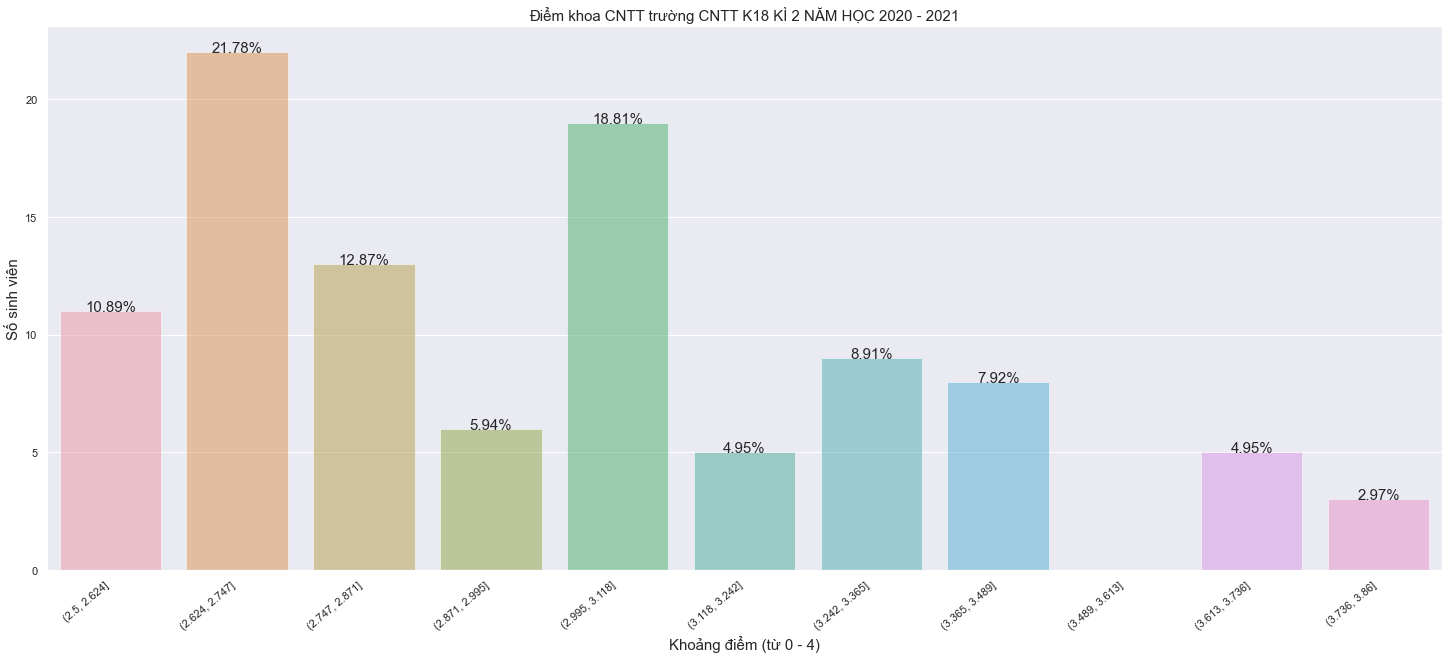

In [165]:
figure(figsize = (25,10))
plt.title("Điểm khoa CNTT trường CNTT K18 KÌ 2 NĂM HỌC 2020 - 2021", size = 15)
ax = sns.countplot(x = "binned", data = K18Mark4, alpha = 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.xlabel("Khoảng điểm (từ 0 - 4)", size = 15)
plt.ylabel("Số sinh viên", size = 15)

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(K18Mark4[K18Mark4['Điểm hệ 4'] >= 2.5]))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha = "center", size = 15)

In [166]:
K18CNTTMark4 = pd.read_excel("K18Mark.xlsx",na_values = ":", usecols = ["Mã SV","Họ","Tên","Lớp","Điểm hệ 4"], sheet_name = 'Ngành CNTT')
display(K18CNTTMark4.head())
print("Shape:",K18CNTTMark4.shape)
print(f"Min Điểm hệ 4: {K18CNTTMark4['Điểm hệ 4'].min()}, max điểm hệ 4: {K18CNTTMark4['Điểm hệ 4'].max()}")
print(f"Number of unique Lớp: {list(K18CNTTMark4['Lớp'].unique())}")
print("***FREQUENCY***")
print(f"<<<Count of Lớp>>> \n{K18CNTTMark4['Lớp'].value_counts()}")
print(f"<<<Count of Điểm>>> \n{K18CNTTMark4['Điểm hệ 4'].value_counts()}")

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4
0,DTC195480201CLC0002,Bùi Đức,Công,CNTT K18 CLC,1.93
1,DTC195480201CLC0004,Thái Văn,Cường,CNTT K18 CLC,2.79
2,DTC19H4802010104,Vũ Văn,Cường,CNTT K18 CLC,2.79
3,DTC195480201CLC0005,Nguyễn Tiến,Dũng,CNTT K18 CLC,2.36
4,DTC1954802010038,Trần Nguyên,Dũng,CNTT K18 CLC,2.79


Shape: (211, 5)
Min Điểm hệ 4: 0.0, max điểm hệ 4: 3.86
Number of unique Lớp: ['CNTT K18 CLC', 'CNTT K18A', 'CNTT K18B', 'CNTT K18C', 'CNTT K18D', 'CNTT K18ĐT', 'CNTT K18E']
***FREQUENCY***
<<<Count of Lớp>>> 
CNTT K18A       45
CNTT K18D       39
CNTT K18B       35
CNTT K18C       33
CNTT K18 CLC    26
CNTT K18E       23
CNTT K18ĐT      10
Name: Lớp, dtype: int64
<<<Count of Điểm>>> 
0.00    11
1.57     9
1.93     8
2.79     8
3.00     8
        ..
2.75     1
1.94     1
2.86     1
1.82     1
1.07     1
Name: Điểm hệ 4, Length: 87, dtype: int64


In [167]:
nbins = 15
arrDiem = np.array(K18CNTTMark4['Điểm hệ 4'])
bins = np.linspace(2.49999, arrDiem.max(), 14)
print(f"Number of interval {nbins} bins is calculated:")
display(bins)
K18CNTTMark4["binned"] = pd.cut(arrDiem, bins)
display(K18CNTTMark4.head())
print(K18CNTTMark4["binned"].value_counts())

Number of interval 15 bins is calculated:


array([2.49999   , 2.60460615, 2.70922231, 2.81383846, 2.91845462,
       3.02307077, 3.12768692, 3.23230308, 3.33691923, 3.44153538,
       3.54615154, 3.65076769, 3.75538385, 3.86      ])

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4,binned
0,DTC195480201CLC0002,Bùi Đức,Công,CNTT K18 CLC,1.93,NaN
1,DTC195480201CLC0004,Thái Văn,Cường,CNTT K18 CLC,2.79,"(2.709, 2.814]"
2,DTC19H4802010104,Vũ Văn,Cường,CNTT K18 CLC,2.79,"(2.709, 2.814]"
3,DTC195480201CLC0005,Nguyễn Tiến,Dũng,CNTT K18 CLC,2.36,NaN
4,DTC1954802010038,Trần Nguyên,Dũng,CNTT K18 CLC,2.79,"(2.709, 2.814]"


(2.709, 2.814]    13
(2.918, 3.023]    11
(2.605, 2.709]    10
(3.337, 3.442]     7
(2.5, 2.605]       5
(2.814, 2.918]     5
(3.128, 3.232]     4
(3.232, 3.337]     3
(3.755, 3.86]      3
(3.023, 3.128]     2
(3.651, 3.755]     2
(3.546, 3.651]     1
(3.442, 3.546]     0
Name: binned, dtype: int64


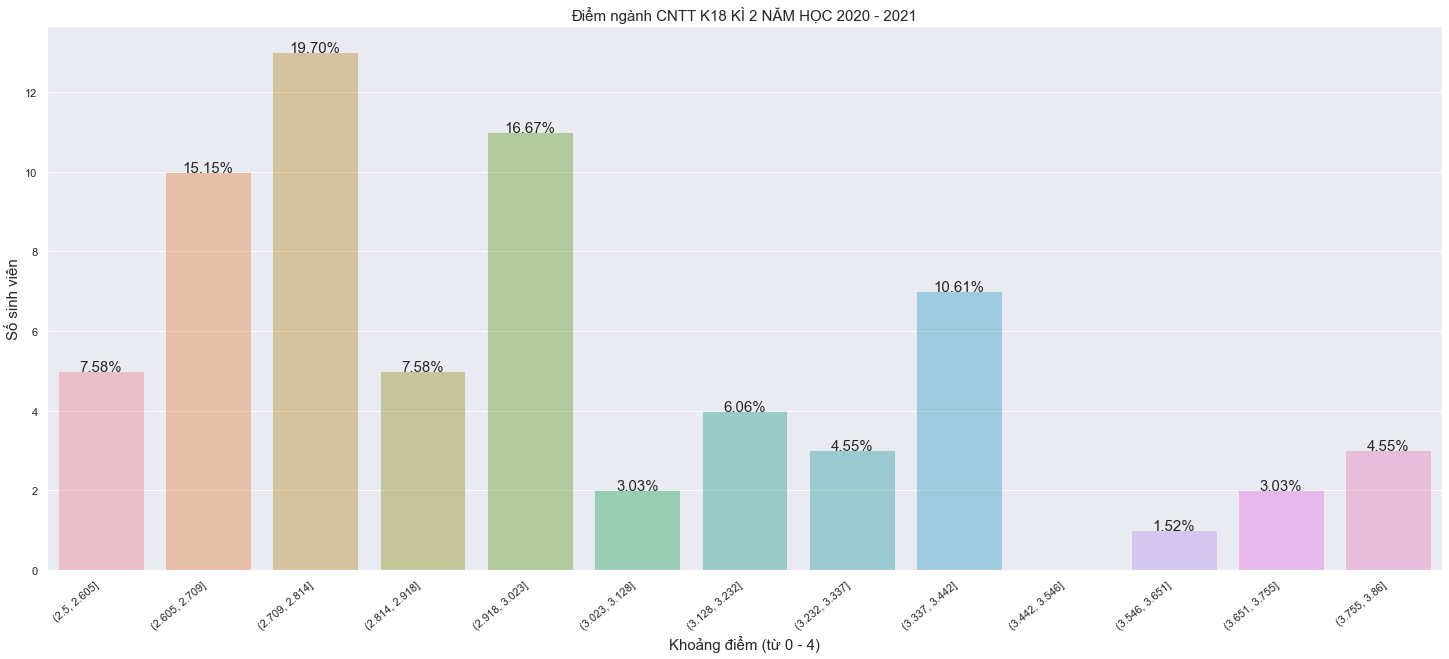

In [168]:
figure(figsize = (25,10))
plt.title("Điểm ngành CNTT K18 KÌ 2 NĂM HỌC 2020 - 2021", size = 15)
ax = sns.countplot(x = "binned", data = K18CNTTMark4, alpha = 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.xlabel("Khoảng điểm (từ 0 - 4)", size = 15)
plt.ylabel("Số sinh viên", size = 15)

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(K18CNTTMark4[K18CNTTMark4['Điểm hệ 4'] >= 2.5]))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha = "center", size = 15)
plt.savefig("File\\Điểm ngành CNTT kì 2 năm học 2020 - 2021.jpg")